<a href="https://colab.research.google.com/github/ucheokechukwu/No-Context-Experiments/blob/main/Duplicate-Detector/2%20Features%20Model/Model_Building_and_Testing_Using_Doc2Vec_DM_and_2_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Note**: This notebook continues from the previous notebook on EDA and Feature Engineering. Most of this Notebook was prepared with Google Colab. The URLs to file locations on Google Drive can be replaced by the local file path. i.e. `/content/drive/MyDrive/output/train_complete.csv` should be substituted with `../output/train_complete.csv`

Please note that some files were considered too large for Git and are not available.

In [ ]:
from google.colab import drive
drive.mount('drive')
import os
os.chdir("/content/drive/MyDrive/MLOPs_Projects/Quora_Duplicate_Dectector_V2/src")

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


# Modeling - Deep Learning

Deep Learning experiments start here. The strategy is to start with a simple model and one feature, and build up on from there.

## Note on Building the Dataset

The csvs datasets will be converted to the Tensorflow's `.dataset` class, which will optimize the training process and reduce the memory load on the processors.

From the website:

https://www.tensorflow.org/api_docs/python/tf/data/Dataset

The `tf.data.Dataset API` supports writing descriptive and efficient input pipelines. Dataset usage follows a common pattern:

- Create a source dataset from your input data.
- Apply dataset transformations to preprocess the data.
- Iterate over the dataset and process the elements.
Iteration happens in a streaming fashion, **so the full dataset does not need to fit into memory**.




In [ ]:
import sys
sys.path.append('trainer')
from model_trainer import *
from model_builder import *
from dataset_builder import *

train_df, test_df, y_test, y_train = get_train_test_df_2_features()
train_dataset, validation_dataset, test_dataset = get_model_6_dataset(train_df, test_df)

## GridSearch Model


In [ ]:
from sklearn.model_selection import ParameterGrid
from tqdm.auto import tqdm
    # putting the hyperparameters into a grid
params = {
        'features_hidden_units' : [8, 16],
        'concat_hidden_units' : [128, 256],
        'dropout' : [False],
    }
param_grid = ParameterGrid(params)

models_dictionary = {}

  0%|          | 0/4 [00:00<?, ?it/s]




Parameters : dict_values([128, False, 8])


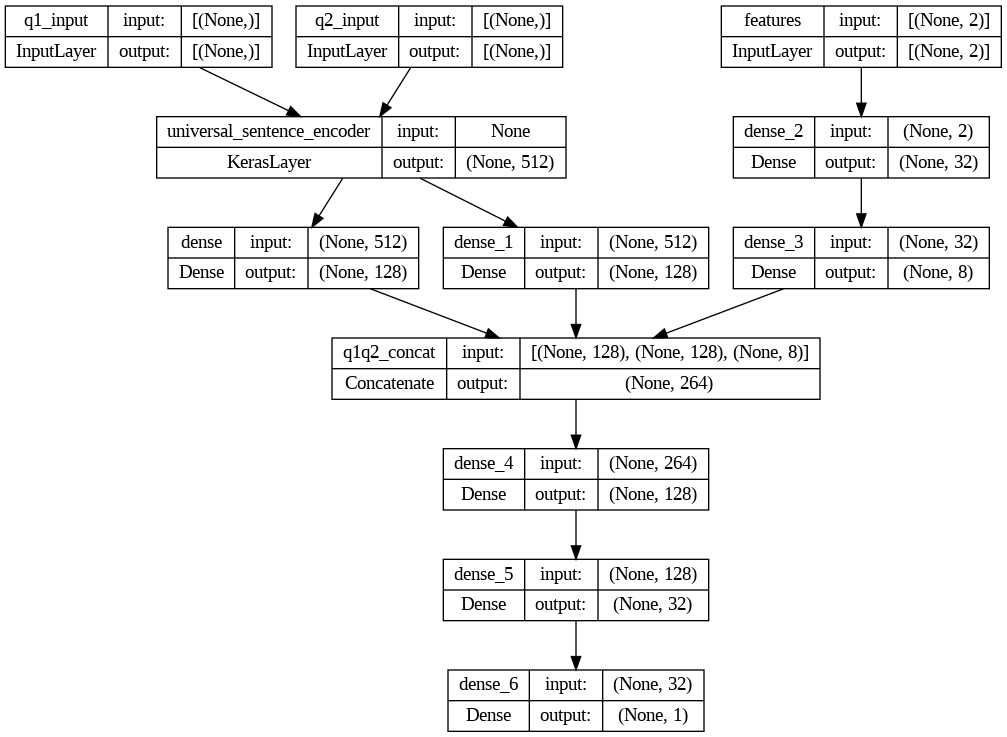

Training Model model_features_hidden_units_8_concat_hidden_units_128_dropout_False
Epoch 1/100
258/258 [==============================] - 35s 107ms/step - loss: 0.5439 - accuracy: 0.7131 - val_loss: 0.5323 - val_accuracy: 0.7232
Epoch 2/100
258/258 [==============================] - 27s 105ms/step - loss: 0.4976 - accuracy: 0.7539 - val_loss: 0.4970 - val_accuracy: 0.7522
Epoch 3/100
258/258 [==============================] - 26s 100ms/step - loss: 0.4864 - accuracy: 0.7597 - val_loss: 0.4874 - val_accuracy: 0.7612
Epoch 4/100
258/258 [==============================] - 26s 102ms/step - loss: 0.4854 - accuracy: 0.7592 - val_loss: 0.4943 - val_accuracy: 0.7556
Epoch 5/100
258/258 [==============================] - 27s 107ms/step - loss: 0.4735 - accuracy: 0.7622 - val_loss: 0.4799 - val_accuracy: 0.7567
Epoch 6/100
258/258 [==============================] - 29s 111ms/step - loss: 0.4634 - accuracy: 0.7717 - val_loss: 0.4822 - val_accuracy: 0.7768
Epoch 7/100
258/258 [====================

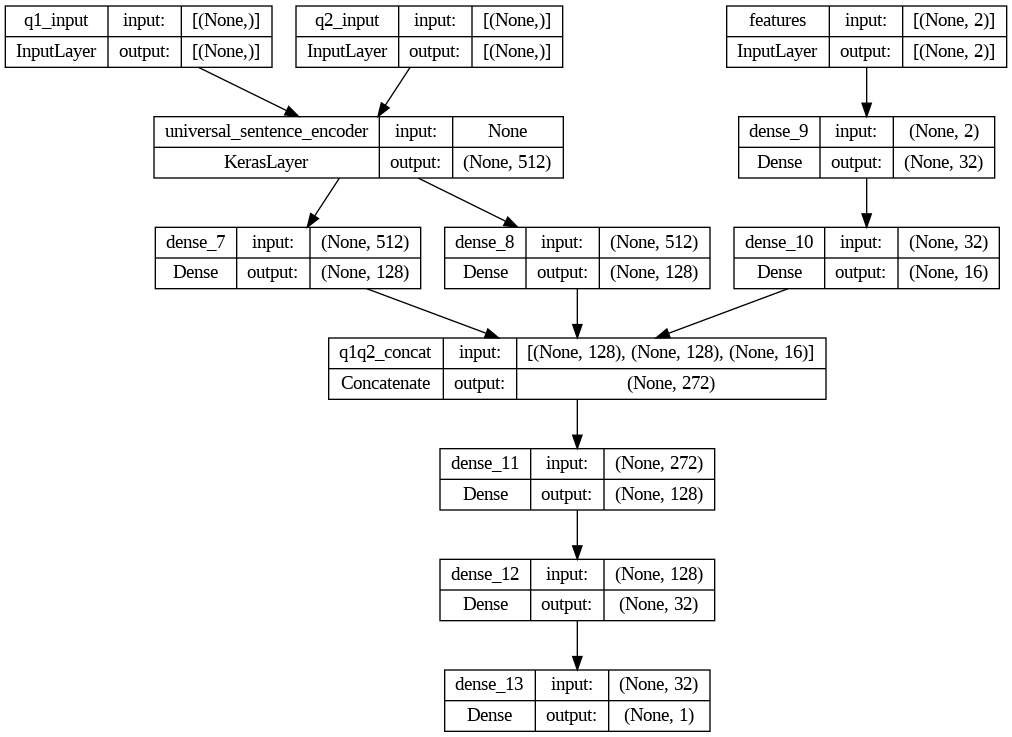

Training Model model_features_hidden_units_16_concat_hidden_units_128_dropout_False
Epoch 1/100
258/258 [==============================] - 26s 97ms/step - loss: 0.5434 - accuracy: 0.7127 - val_loss: 0.5036 - val_accuracy: 0.7467
Epoch 2/100
258/258 [==============================] - 26s 102ms/step - loss: 0.4957 - accuracy: 0.7504 - val_loss: 0.4941 - val_accuracy: 0.7500
Epoch 3/100
258/258 [==============================] - 26s 100ms/step - loss: 0.4829 - accuracy: 0.7603 - val_loss: 0.4880 - val_accuracy: 0.7567
Epoch 4/100
258/258 [==============================] - 25s 96ms/step - loss: 0.4848 - accuracy: 0.7550 - val_loss: 0.4897 - val_accuracy: 0.7645
Epoch 5/100
258/258 [==============================] - 26s 101ms/step - loss: 0.4769 - accuracy: 0.7590 - val_loss: 0.4718 - val_accuracy: 0.7623
Epoch 6/100
258/258 [==============================] - 28s 107ms/step - loss: 0.4613 - accuracy: 0.7764 - val_loss: 0.4811 - val_accuracy: 0.7812
Epoch 7/100
258/258 [=====================

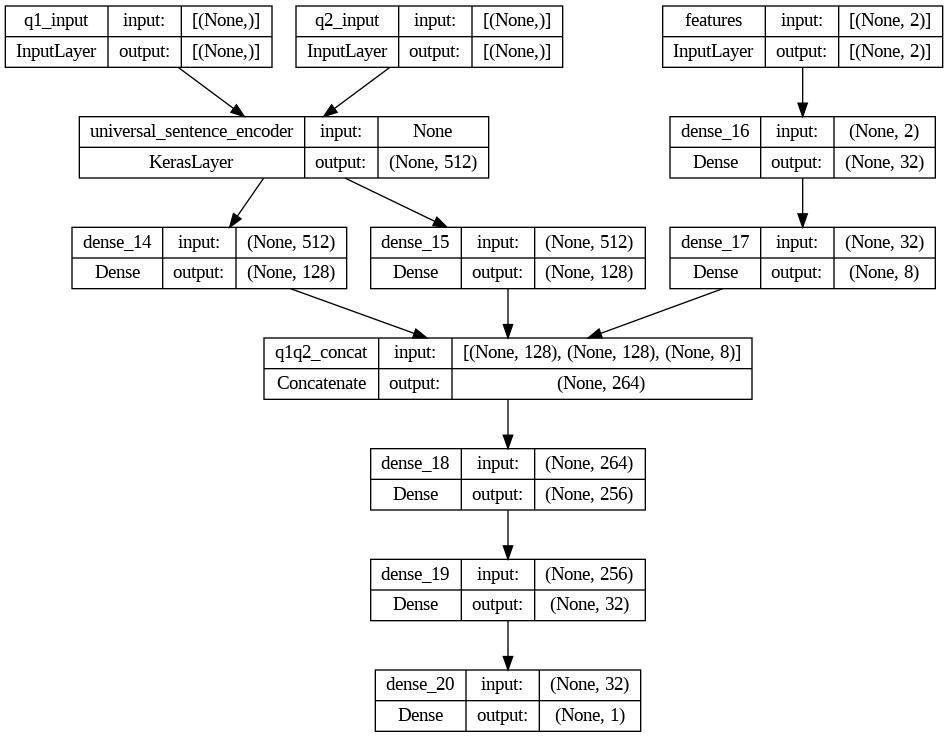

Training Model model_features_hidden_units_8_concat_hidden_units_256_dropout_False
Epoch 1/100
258/258 [==============================] - 27s 104ms/step - loss: 0.5429 - accuracy: 0.7132 - val_loss: 0.5111 - val_accuracy: 0.7444
Epoch 2/100
258/258 [==============================] - 26s 102ms/step - loss: 0.4964 - accuracy: 0.7500 - val_loss: 0.5001 - val_accuracy: 0.7455
Epoch 3/100
258/258 [==============================] - 25s 99ms/step - loss: 0.4890 - accuracy: 0.7561 - val_loss: 0.4918 - val_accuracy: 0.7578
Epoch 4/100
258/258 [==============================] - 27s 103ms/step - loss: 0.4878 - accuracy: 0.7584 - val_loss: 0.5113 - val_accuracy: 0.7589
Epoch 5/100
258/258 [==============================] - 26s 100ms/step - loss: 0.4812 - accuracy: 0.7591 - val_loss: 0.4831 - val_accuracy: 0.7690
Epoch 6/100
258/258 [==============================] - 28s 108ms/step - loss: 0.4628 - accuracy: 0.7734 - val_loss: 0.4917 - val_accuracy: 0.7746
Epoch 7/100
258/258 [=====================

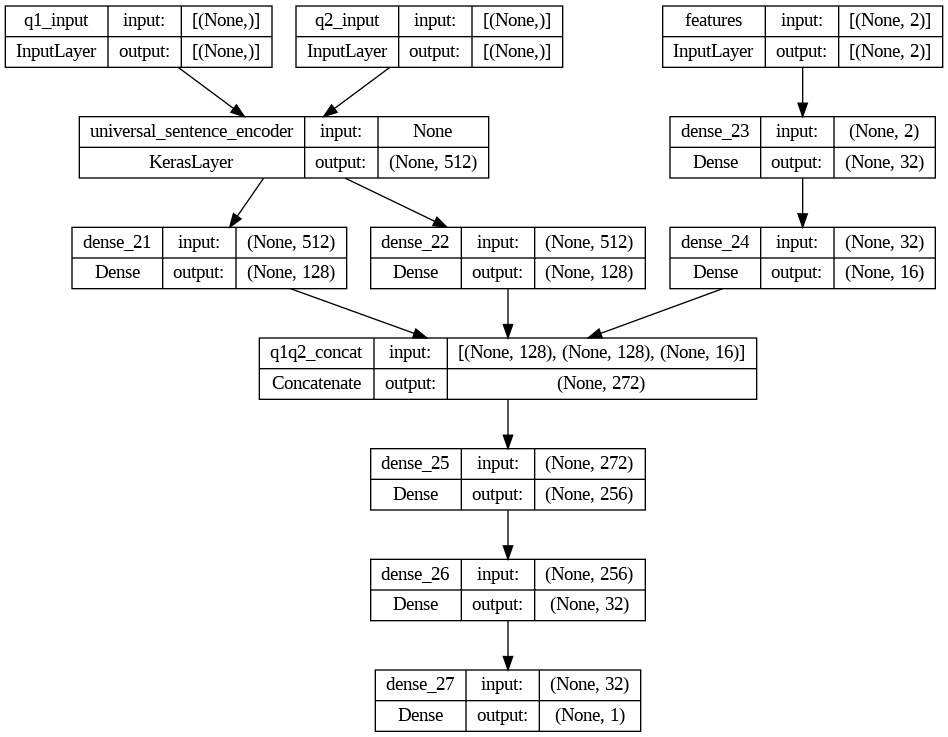

Training Model model_features_hidden_units_16_concat_hidden_units_256_dropout_False
Epoch 1/100
258/258 [==============================] - 28s 107ms/step - loss: 0.5420 - accuracy: 0.7171 - val_loss: 0.5099 - val_accuracy: 0.7411
Epoch 2/100
258/258 [==============================] - 26s 101ms/step - loss: 0.4949 - accuracy: 0.7484 - val_loss: 0.4896 - val_accuracy: 0.7511
Epoch 3/100
258/258 [==============================] - 26s 102ms/step - loss: 0.4882 - accuracy: 0.7568 - val_loss: 0.4885 - val_accuracy: 0.7522
Epoch 4/100
258/258 [==============================] - 28s 107ms/step - loss: 0.4859 - accuracy: 0.7587 - val_loss: 0.4991 - val_accuracy: 0.7511
Epoch 5/100
258/258 [==============================] - 27s 106ms/step - loss: 0.4798 - accuracy: 0.7616 - val_loss: 0.4765 - val_accuracy: 0.7567
Epoch 6/100
258/258 [==============================] - 29s 111ms/step - loss: 0.4605 - accuracy: 0.7736 - val_loss: 0.4786 - val_accuracy: 0.7768
Epoch 7/100
258/258 [===================

In [ ]:
for dict_ in tqdm(param_grid):
    print('\n\n\nParameters :', dict_.values())

    concat_hidden_units, dropout, features_hidden_units = dict_.values()
    if features_hidden_units == 32 & concat_hidden_units == 128:
        continue
    elif features_hidden_units == 8 & concat_hidden_units == 256:
        continue
    else:
        pass
    model, name = build_grid_model(features_hidden_units, concat_hidden_units, dropout)
    print(f"Training Model {name}")
    model, history = train_model(model, name,
                                train_dataset,
                                validation_dataset,
                                 patience=10,
                                 num_epochs=100)
    models_dictionary[name] = [model, test_dataset, history]



# Evaluations

316/316 [==============================] - 13s 40ms/step


<Figure size 2000x2000 with 0 Axes>

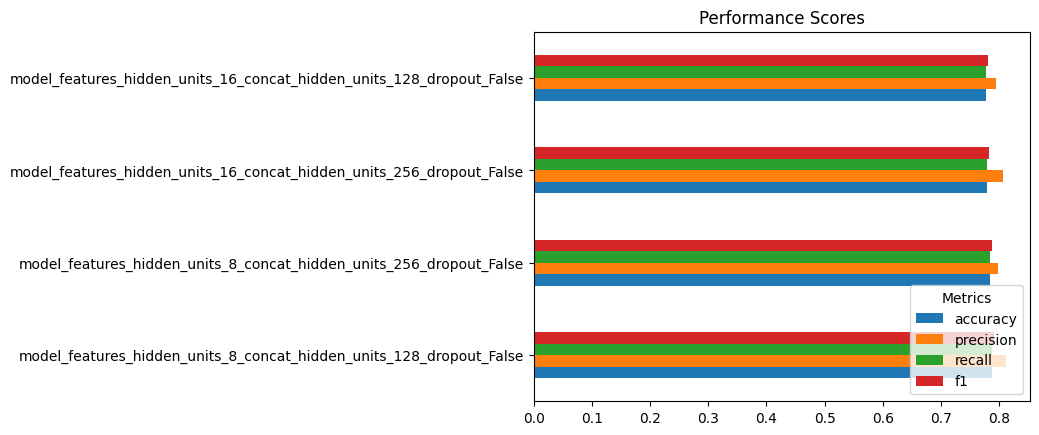

In [ ]:
import matplotlib.pyplot as plt

results = []
for k, v in models_dictionary.items():
    model_name = k
    model, test_data = v[0], v[1]
    result, _ = calculate_results(model, test_data, y_test)
    results.append(result)

all_results = pd.DataFrame(results)
all_results.index = models_dictionary.keys()
plt.figure(figsize=(20,20))
all_results = all_results.sort_values('f1', ascending=False)

all_results.plot(kind='barh')
plt.legend(loc='lower right', title='Metrics')
plt.title('Performance Scores')
plt.show()

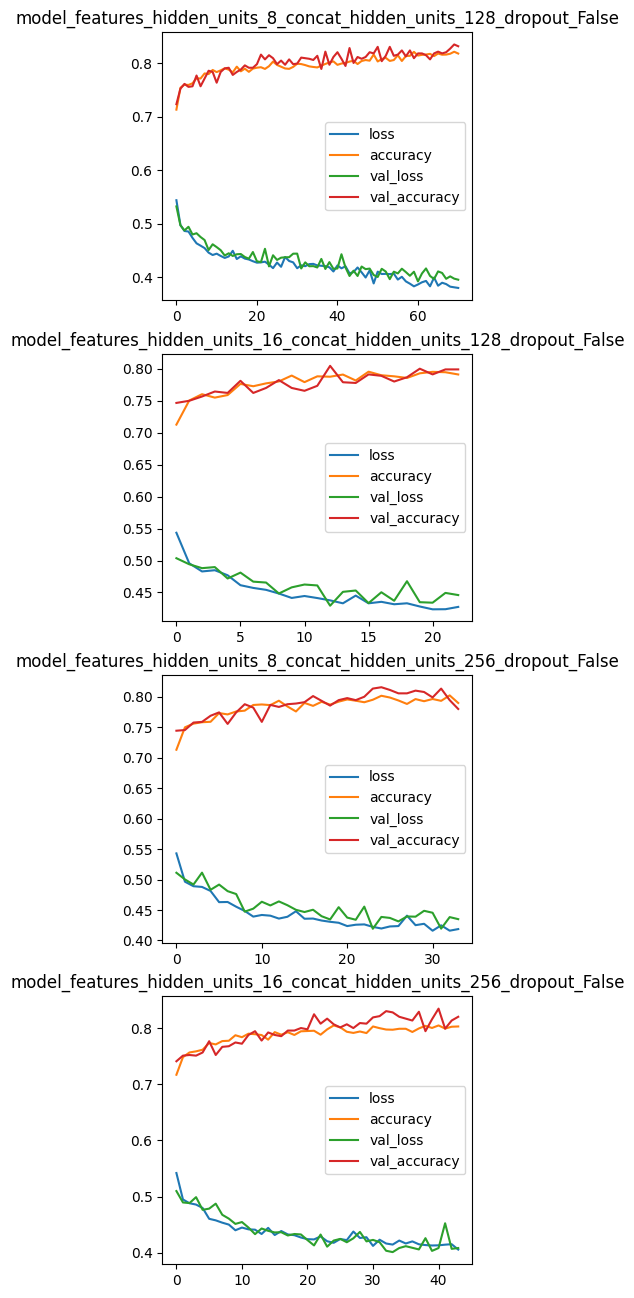

In [ ]:
fig, ax = plt.subplots(len(models_dictionary),1, figsize=(4,len(models_dictionary)*4))
i = 0
for k, v in models_dictionary.items():
    title = k
    history = v[-1]
    plot_history(history, title, ax[i])
    i +=1
plt.show()

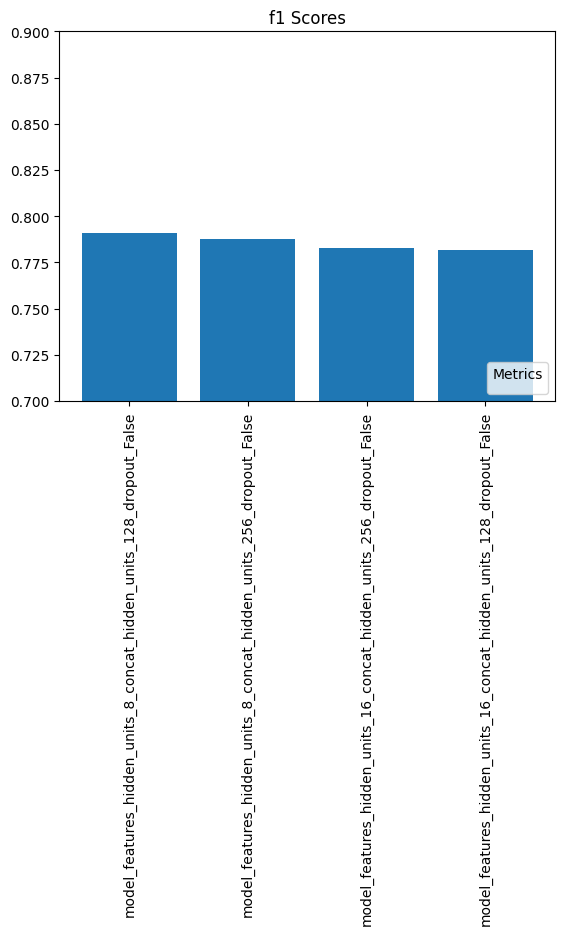

,accuracy,precision,recall,f1
model_features_hidden_units_8_concat_hidden_units_128_dropout_False,0.787380,0.812719,0.787380,0.790933
model_features_hidden_units_8_concat_hidden_units_256_dropout_False,0.784981,0.798569,0.784981,0.787935
model_features_hidden_units_16_concat_hidden_units_256_dropout_False,0.779193,0.807238,0.779193,0.782934


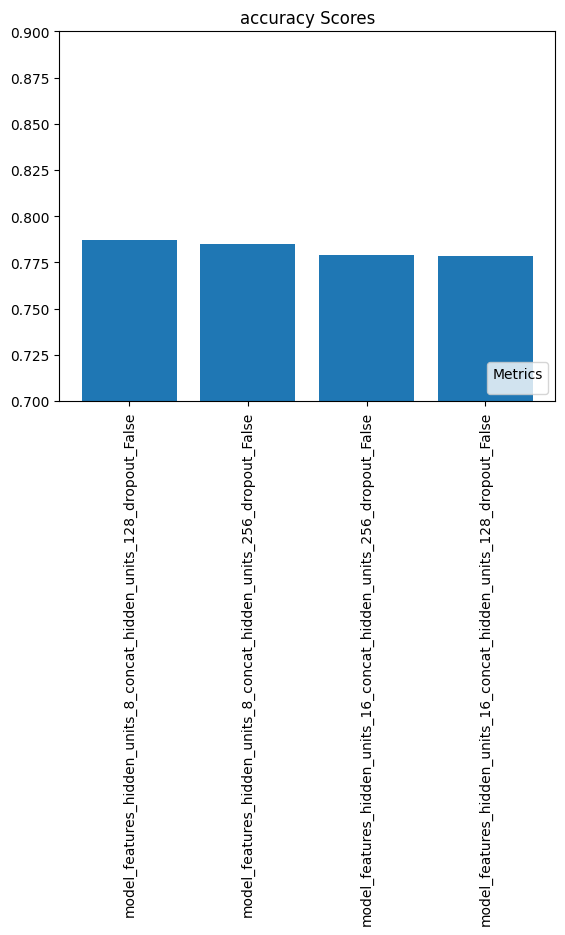

,accuracy,precision,recall,f1
model_features_hidden_units_8_concat_hidden_units_128_dropout_False,0.787380,0.812719,0.787380,0.790933
model_features_hidden_units_8_concat_hidden_units_256_dropout_False,0.784981,0.798569,0.784981,0.787935
model_features_hidden_units_16_concat_hidden_units_256_dropout_False,0.779193,0.807238,0.779193,0.782934


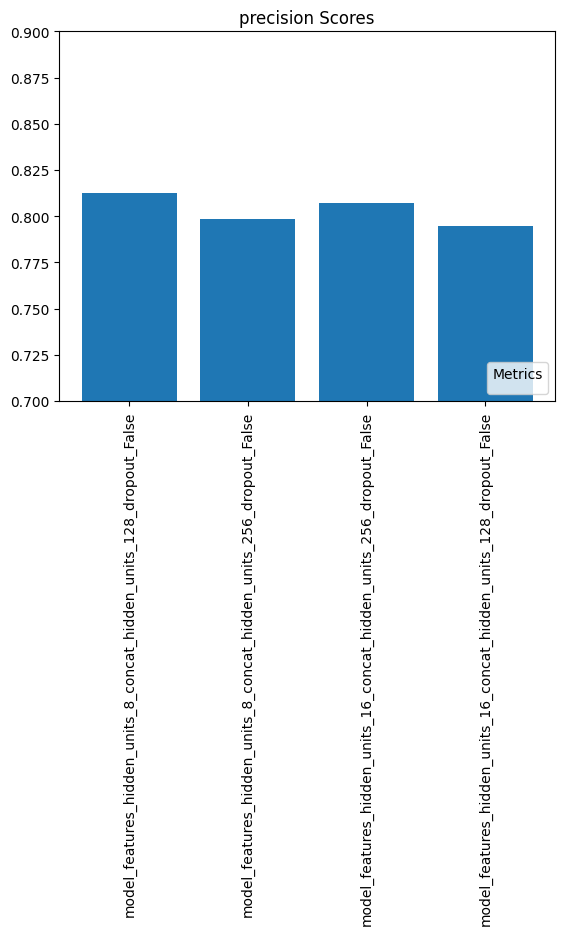

,accuracy,precision,recall,f1
model_features_hidden_units_8_concat_hidden_units_128_dropout_False,0.787380,0.812719,0.787380,0.790933
model_features_hidden_units_8_concat_hidden_units_256_dropout_False,0.784981,0.798569,0.784981,0.787935
model_features_hidden_units_16_concat_hidden_units_256_dropout_False,0.779193,0.807238,0.779193,0.782934


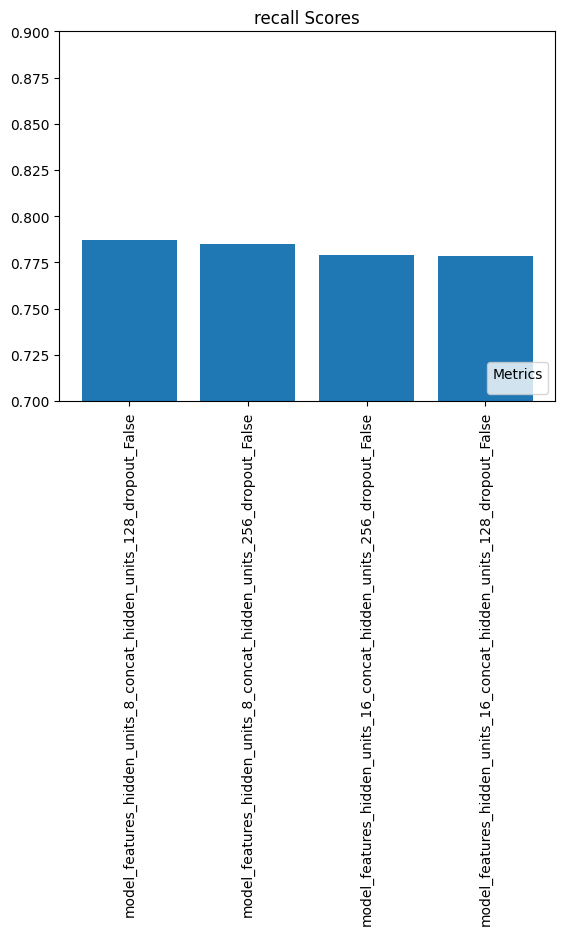

,accuracy,precision,recall,f1
model_features_hidden_units_8_concat_hidden_units_128_dropout_False,0.787380,0.812719,0.787380,0.790933
model_features_hidden_units_8_concat_hidden_units_256_dropout_False,0.784981,0.798569,0.784981,0.787935
model_features_hidden_units_16_concat_hidden_units_256_dropout_False,0.779193,0.807238,0.779193,0.782934


In [ ]:
all_results = pd.DataFrame(results)

all_results.index = models_dictionary.keys()

for value in ['f1', 'accuracy', 'precision', 'recall']:
    all_results = all_results.sort_values(value, ascending=False)
    all_results = all_results.sort_values('f1', ascending=False)
    res_value = all_results[value]
    plt.bar(height=res_value, x=res_value.index)
    plt.xticks(rotation=90)

    plt.legend(loc='lower right', title='Metrics')
    plt.ylim(0.7, 0.9)
    plt.title(f'{value} Scores')
    plt.show()
    display(all_results[:3])